**Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor



In [2]:
import warnings
warnings.filterwarnings("ignore")

**Reading Data**

In [3]:
df = pd.read_csv('gld_price_data.csv')
#df.drop(['Date'], axis = 1, inplace=True)
df.head()

Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099

**Analysis**

Check to see if we have any missing values that we need to impute or remove.

In [4]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


**Inference: There are no null values in the dataset**

In [7]:
df.describe()

SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798

In [8]:
df.duplicated().sum()

0

**Inference: There are no duolicate rows in the dataset**

In [9]:
df.nunique()

Date       2290
SPX        2277
GLD        1930
USO        1514
SLV        1331
EUR/USD    2066
dtype: int64

In [10]:
df['Year'] = pd.to_datetime(df['Date']).dt.strftime('%Y')
df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%m')
df.head()

Date          SPX        GLD        USO     SLV   EUR/USD  Year Month
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692  2008    01
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491  2008    01
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492  2008    01
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299  2008    01
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099  2008    01

In [11]:
df.drop(['Date'], axis = 1, inplace=True)
df.head()

SPX        GLD        USO     SLV   EUR/USD  Year Month
0  1447.160034  84.860001  78.470001  15.180  1.471692  2008    01
1  1447.160034  85.570000  78.370003  15.285  1.474491  2008    01
2  1411.630005  85.129997  77.309998  15.167  1.475492  2008    01
3  1416.180054  84.769997  75.500000  15.053  1.468299  2008    01
4  1390.189941  86.779999  76.059998  15.590  1.557099  2008    01

In [12]:
df[['Year', 'Month']] = df[['Year', 'Month']].astype('int64')

In [13]:
df.head()

SPX        GLD        USO     SLV   EUR/USD  Year  Month
0  1447.160034  84.860001  78.470001  15.180  1.471692  2008      1
1  1447.160034  85.570000  78.370003  15.285  1.474491  2008      1
2  1411.630005  85.129997  77.309998  15.167  1.475492  2008      1
3  1416.180054  84.769997  75.500000  15.053  1.468299  2008      1
4  1390.189941  86.779999  76.059998  15.590  1.557099  2008      1

In [14]:
df.dtypes

SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
Year         int64
Month        int64
dtype: object

**Explore with visuals**

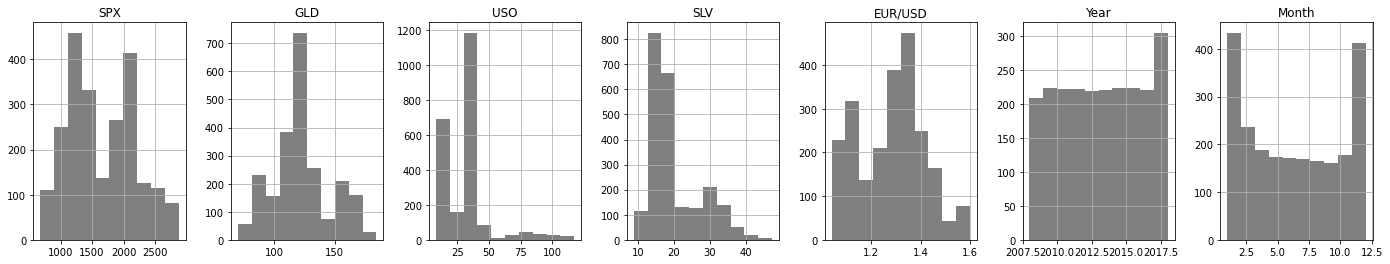

In [15]:
df.hist(figsize=(24,4),layout=(1,7), color="Grey");

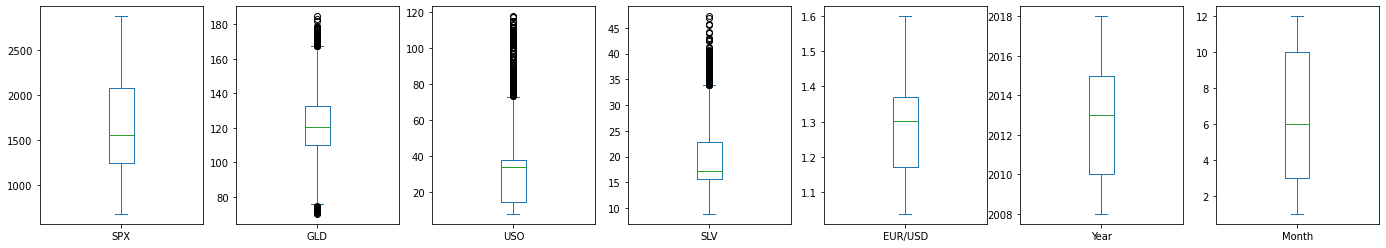

In [16]:
df.plot(kind="box", subplots=True, layout=(1,7), figsize=(24,4),sharex=False, sharey=False);

**Detecting and removing outlier**

<AxesSubplot:xlabel='GLD'>

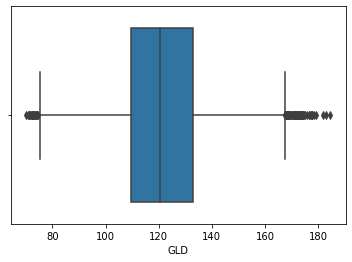

In [17]:
sns.boxplot(df['GLD'])

In [18]:
q1 = df['GLD'].quantile(0.25)
q3 = df['GLD'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df1 = df.loc[(df['GLD'] > fence_low) & (df['GLD'] < fence_high)]
df1.shape

(2175, 7)

In [19]:
sns.boxplot(df1['GLD'])

<AxesSubplot:xlabel='GLD'>

<AxesSubplot:xlabel='USO'>

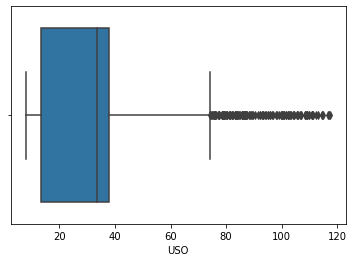

In [20]:
sns.boxplot(df1['USO'])

In [21]:
Q1 = df1['USO'].quantile(0.25)
Q3 = df1['USO'].quantile(0.75)
IQR =Q3-Q1 #Interquartile range
fl  = Q1-1.5*IQR
fh = Q3+1.5*IQR
df2 = df1.loc[(df1['USO'] > fl) & (df1['USO'] < fh)]
df2.shape

(2048, 7)

<AxesSubplot:xlabel='USO'>

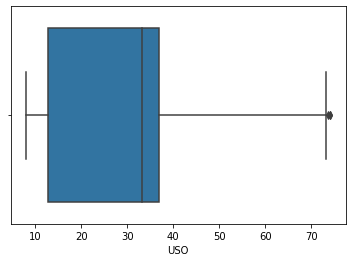

In [22]:
sns.boxplot(df2['USO'])

<AxesSubplot:xlabel='SLV'>

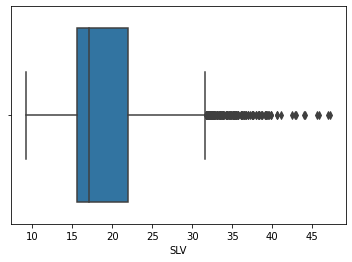

In [23]:
sns.boxplot(df2['SLV'])

In [24]:
std = df2.SLV.std()
mean = df2.SLV.mean()

upperlim = mean + (3 * std)
lowerlim = mean - (3 * std)
        
df3 = df2[(df2.SLV>lowerlim) & (df2.SLV<upperlim)]
df3.shape

(2034, 7)

<AxesSubplot:xlabel='SLV'>

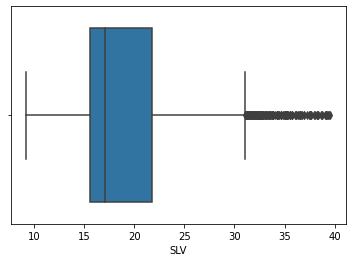

In [25]:
sns.boxplot(df3['SLV'])

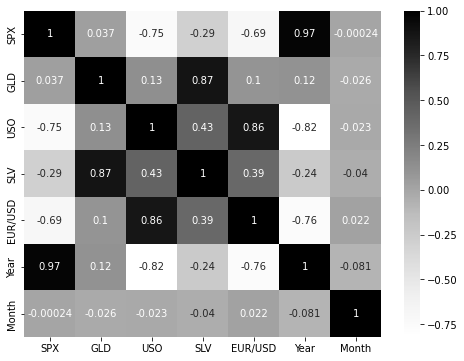

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df3.corr(), annot=True, cmap='Greys');

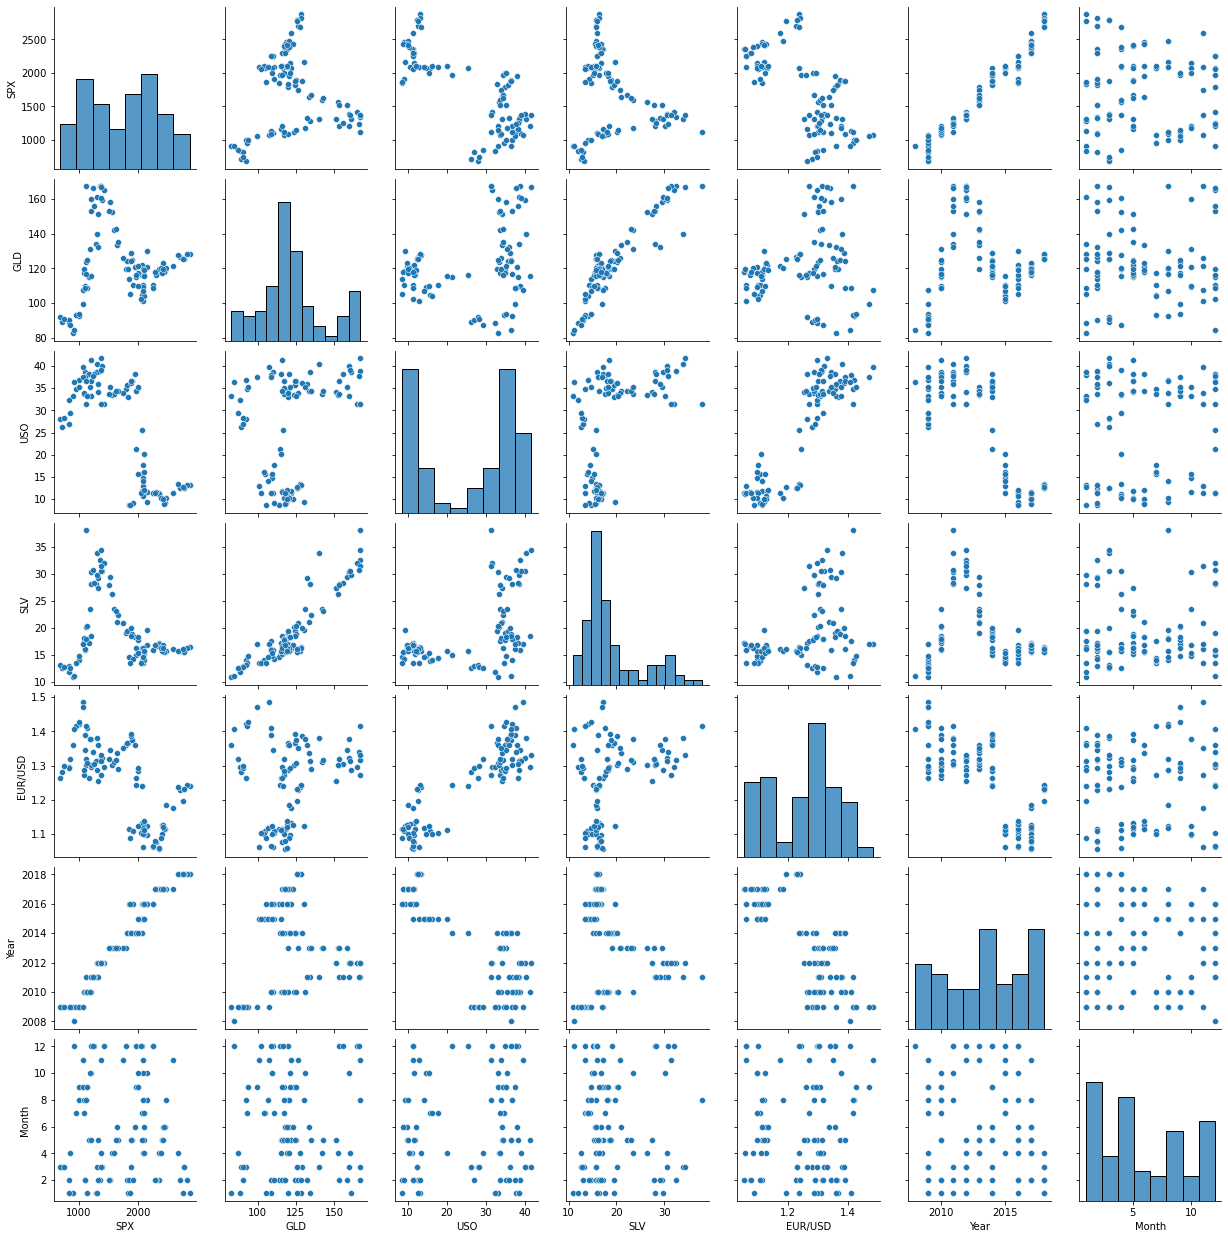

In [27]:
sns.pairplot(df3.sample(n=100));

Preprocessing 

In [28]:
date_columns = ['Date']
num_columns =df3.select_dtypes(include=['float64', 'int64']).columns
target_col = 'GLD'

In [29]:
num_columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD', 'Year', 'Month'], dtype='object')

In [30]:
df3.shape

(2034, 7)

In [31]:
df3.corr()

SPX       GLD       USO       SLV   EUR/USD      Year     Month
SPX      1.000000  0.036831 -0.748166 -0.292474 -0.690371  0.970396 -0.000240
GLD      0.036831  1.000000  0.134033  0.874205  0.103067  0.116443 -0.025517
USO     -0.748166  0.134033  1.000000  0.430923  0.862824 -0.820972 -0.022538
SLV     -0.292474  0.874205  0.430923  1.000000  0.390916 -0.240691 -0.039739
EUR/USD -0.690371  0.103067  0.862824  0.390916  1.000000 -0.764030  0.021889
Year     0.970396  0.116443 -0.820972 -0.240691 -0.764030  1.000000 -0.081407
Month   -0.000240 -0.025517 -0.022538 -0.039739  0.021889 -0.081407  1.000000

**Partitioning data into train and test split**

In [32]:
## train test split
X = df3.drop(['GLD'], axis = 1)
Y = df3['GLD']


In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [34]:
# Taking Numeric columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)


Index(['SPX', 'USO', 'SLV', 'EUR/USD', 'Year', 'Month'], dtype='object')


In [35]:
#Creating a Data Pipeline
from sklearn.preprocessing import StandardScaler
n_transformer = Pipeline(steps=
                       [
#                            ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())
                       ])



In [36]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(
    transformers= [('numeric',n_transformer,numeric_cols)]
)


**Decision Tree Regressor**

In [37]:
#Create estimator
estimator = DecisionTreeRegressor(max_depth = 4)


In [38]:
#add estimator to pipeline
my_model = Pipeline(
    steps = [
        
      ('preprocessor', preprocessing), #Preprocessing
      ('est', estimator)  #Model
    ]
)


In [39]:
from sklearn import set_config
set_config(display='diagram')
my_model.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['SPX', 'USO', 'SLV', 'EUR/USD', 'Year', 'Month'], dtype='object'))])),
                ('est', DecisionTreeRegressor(max_depth=4))])

In [40]:
y_pred = my_model.predict(x_test)


In [41]:
xt_dt = my_model.score(x_train,y_train)
yt_dt = my_model.score(x_test,y_test)
print( "Decision Tree train accurracy:" , xt_dt ) 
print( "Decision Tree test accurracy:" ,  yt_dt)

Decision Tree train accurracy: 0.941860251868289
Decision Tree test accurracy: 0.9372381085767545


In [42]:
from sklearn.metrics import r2_score
r2_dr = r2_score(y_test, y_pred)
print("r2: {}".format(r2_dr))

r2: 0.9372381085767545


In [69]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_smse = np.sqrt(lin_mse)
print("mse: {}".format(lin_mse))
print("rmse: {}".format(lin_smse))

mse: 25.459059304899384
rmse: 5.045697107922688


In [44]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print("mae: {}".format(lin_mae)) 

mae: 3.7408551653571283


**KNeighborsRegressor**

In [45]:
#KNN
model = KNeighborsRegressor(n_neighbors=3)

In [46]:
pipelinemodel = Pipeline(
    steps = [
      ('preprocessor', preprocessing), #Preprocessing
      ('est', model)  #Model
    ]
)

In [47]:
from sklearn import set_config
set_config(display='diagram')
#fit data
pipelinemodel.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['SPX', 'USO', 'SLV', 'EUR/USD', 'Year', 'Month'], dtype='object'))])),
                ('est', KNeighborsRegressor(n_neighbors=3))])

In [48]:
xt_kn = pipelinemodel.score(x_train,y_train)
yt_kn = pipelinemodel.score(x_test,y_test)
print( "KNeigborsregessor Train Accurary:", xt_kn)
print("KNeigborsregessor Test Accurary:", yt_kn)

KNeigborsregessor Train Accurary: 0.9984227259628319
KNeigborsregessor Test Accurary: 0.9961545688876694


In [49]:
y_pred1 = pipelinemodel.predict(x_test)

In [50]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred1)
print("KNN r2: {}".format(lin_r2))

KNN r2: 0.9961545688876694


In [68]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred1, y_test)
lin_smse = np.sqrt(lin_mse)
print("KNN mse: {}".format(lin_mse))
print("KNN rmse: {}".format(lin_smse)) 

KNN mse: 1.559880630134586
KNN rmse: 1.2489518125750834


In [52]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred1, y_test)
print("mae: {}".format(lin_mae)) 

mae: 0.9323802784602777


**Linear Regression**

In [53]:
# Linear Regression
modellr = LinearRegression()

In [54]:
pipelinemodellr = Pipeline(
    steps = [ 
      ('preprocessor', preprocessing), #Preprocessing
      ('est', modellr)  #Model
    ]
)

In [55]:
from sklearn import set_config
set_config(display='diagram')
#fit data
pipelinemodellr.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['SPX', 'USO', 'SLV', 'EUR/USD', 'Year', 'Month'], dtype='object'))])),
                ('est', LinearRegression())])

In [56]:
xt_lr = pipelinemodellr.score(x_train,y_train)
yt_lr = pipelinemodellr.score(x_test,y_test)

print( "Linear Regression train accurracy:" , xt_lr )
print( "Linear Regression test accurracy:" , yt_lr)

Linear Regression train accurracy: 0.9023025665365364
Linear Regression test accurracy: 0.8919748424743947


In [57]:
y_predlr = pipelinemodellr.predict(x_test) 

In [58]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predlr)
print("r2: {}".format(r2))

r2: 0.8919748424743947


In [59]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_predlr, y_test)
lin_smse = np.sqrt(lin_mse)
print("mse: {}".format(lin_mse))
print("smse: {}".format(lin_smse)) 

mse: 43.81988543523822
smse: 6.6196590120064505


In [60]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_predlr, y_test)
print("mae: {}".format(lin_mae)) 

mae: 5.13398279511793


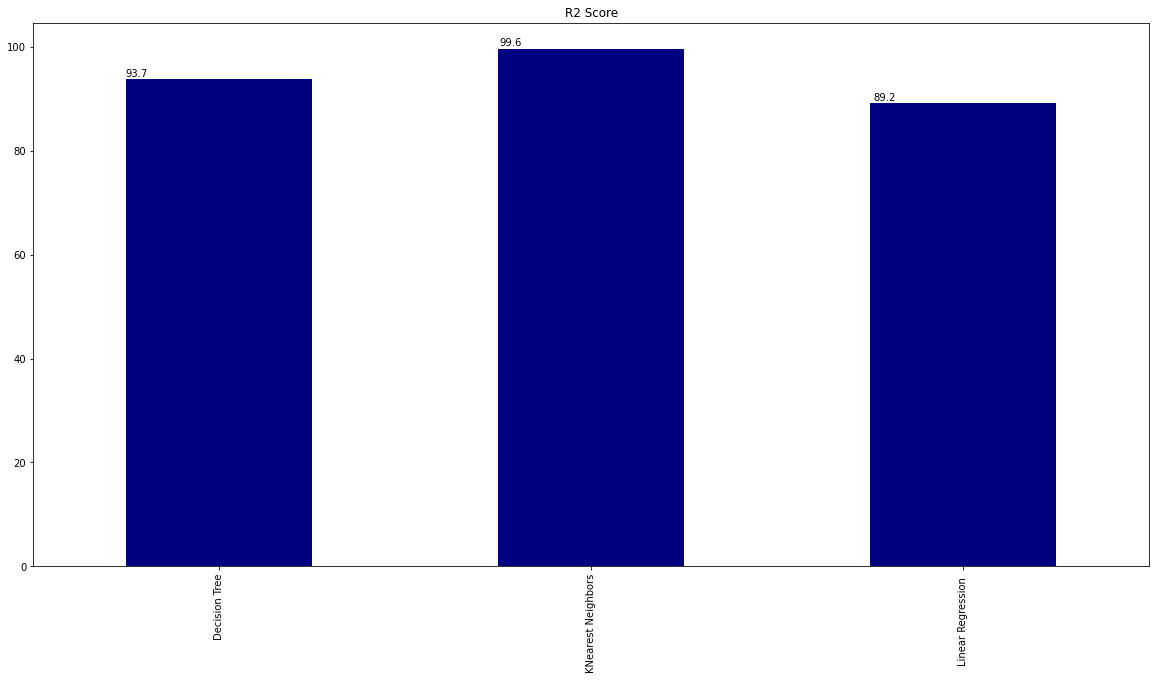

In [61]:
# plotting accuracy of different algorithm
metric_val = {
    "R2 score": {
    "Linear Regression ": yt_lr*100,
    "KNearest Neighbors": yt_kn*100,
    "Decision Tree": yt_dt*100,
    }
}

ax = pd.DataFrame(metric_val).plot(kind="bar", 
                             figsize = (20,10), 
                             legend =False, 
                             title = "R2 Score",
                             color = 'navy');
                    
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [62]:
# printing accuracy for different algorithm to compare accuracy 

print("*"*20, "Accuracy", "*"*20)

print("-"*50)
print("| Linear Regression: ", yt_lr)
print("-"*50)

print("-"*50)
print("| KNearest Neighbors: ", yt_kn)
print("-"*50)

print("-"*50)
print("| Decision Tree: ", yt_dt)
print("-"*50)

******************** Accuracy ********************
--------------------------------------------------
| Linear Regression:  0.8919748424743947
--------------------------------------------------
--------------------------------------------------
| KNearest Neighbors:  0.9961545688876694
--------------------------------------------------
--------------------------------------------------
| Decision Tree:  0.9372381085767545
--------------------------------------------------


**Since KNN is giving high accuracy, we are going to use KNN algorithm**

**Make Prediction for unknown sample**

In [63]:
#sampl = x_test.iloc[0:1,:]
sampl=[[2652.01001,11.43,15.02,1.1883586,2017,1]]
sample = pd.DataFrame(sampl, columns = (['SPX','USO','SLV','EUR/USD','Year','Month']))
sample

SPX    USO    SLV   EUR/USD  Year  Month
0  2652.01001  11.43  15.02  1.188359  2017      1

In [64]:
pipelinemodel.predict(sample)[0]

125.003334

**Saving Machine Learning Model**

In [65]:
import pickle
#save model 
pickle.dump(pipelinemodel,open("model.pkl","wb"))

In [66]:
#load model

pmodel = pickle.load(open("model.pkl","rb"))

In [67]:
pmodel.score(x_test,y_test)

0.9961545688876694